In [48]:
!pip install networkx
!pip install --config-settings="--global-option=build_ext" --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" pygraphviz



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [49]:
import os
import random
import heapq
from typing import Any
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.core.display import Image

basepath = os.path.join('..', 'images')
if not os.path.exists(basepath):
    os.makedirs(os.path.join(basepath), exist_ok=True)

# Aufgabe 01 - Spannbaum Prim

Suchen Sie einen minimalen Spannbaum mit dem Algorithmus von Prim und stellen Sie diesen dar.
    Welche Kosten hat dieser?


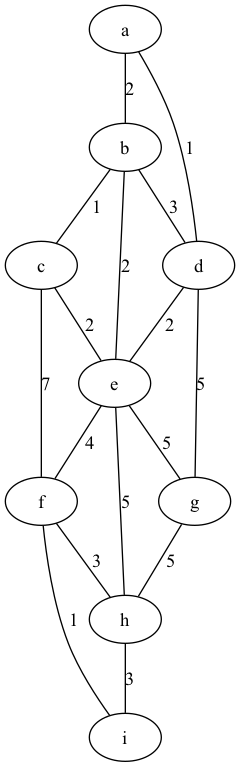

In [50]:
G = nx.Graph()
G.add_edge('a', 'b', weight=2)
G.add_edge('a', 'd', weight=1)
G.add_edge('b', 'c', weight=1)
G.add_edge('b', 'd', weight=3)
G.add_edge('b', 'e', weight=2)
G.add_edge('c', 'e', weight=2)
G.add_edge('c', 'f', weight=7)
G.add_edge('d', 'e', weight=2)
G.add_edge('d', 'g', weight=5)
G.add_edge('e', 'f', weight=4)
G.add_edge('e', 'g', weight=5)
G.add_edge('e', 'h', weight=5)
G.add_edge('f', 'h', weight=3)
G.add_edge('f', 'i', weight=1)
G.add_edge('g', 'h', weight=5)
G.add_edge('h', 'i', weight=3)

g = to_agraph(G)
g.layout(prog='dot')

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_file = os.path.join(basepath, f'a01a_graph.png')
g.draw(graph_file, prog='dot', format='png')

display(Image(graph_file))

[Kyle Kizirian](https://kylekizirian.github.io/prims-algorithm.html)

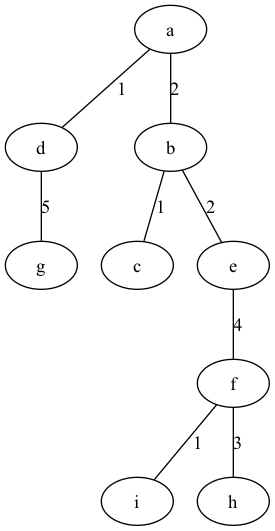

In [51]:
def prim(G: nx.Graph, start_node: Any):

    if start_node not in G.nodes:
        raise ValueError(f'Start node {start_node} not in graph {G.nodes}')

    # Initialize
    mst = nx.Graph()
    visited = {start_node}
    edges = [
        (data['weight'], start_node, to)
        for to, data in G[start_node].items()
    ]
    heapq.heapify(edges)

    while edges:
        weight, frm, to = heapq.heappop(edges)
        if to in visited:
            continue
        visited.add(to)
        mst.add_edge(frm, to, weight=weight)

        for to_next, data in G[to].items():
            if to_next not in visited:
                heapq.heappush(edges, (data['weight'], to, to_next))

    return mst

mst = prim(G, 'a')
# mst = prim(G, random.choice(list(G.nodes)))
g = to_agraph(mst)
g.layout(prog='dot')

for edge in g.edges():
    edge.attr['label'] = edge.attr['weight']

graph_file = os.path.join(basepath, 'a01a_mst.png')
g.draw(graph_file, prog='dot', format='png')
display(Image(graph_file))

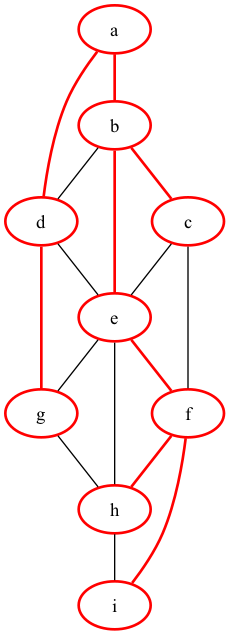

In [52]:
g = to_agraph(G)

# Mark the MST edges in red on the original graph
for edge in mst.edges(data=True):
    g.get_edge(edge[0], edge[1]).attr['color'] = 'red'
    g.get_edge(edge[0], edge[1]).attr['penwidth'] = 2.0

for node in mst.nodes():
    g.get_node(node).attr['color'] = 'red'
    g.get_node(node).attr['penwidth'] = 2.0

highlighted_graph_file = os.path.join(basepath, f'a01a_graph_highlighted.png')
g.draw(highlighted_graph_file, prog='dot', format='png')
display(Image(highlighted_graph_file))